# Linear  Regression

* 지도학습 - 분류 Classification, 회귀 Regression
* 비지도학습 - 군집, 차원 축소 

### OLS: ordinary linear least square

In [2]:
# %pip install statsmodels

In [3]:
import pandas as pd

data = {'x': [1, 2, 3, 4, 5], 'y': [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [4]:
# 가설 세우기
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()

In [5]:
lm_model.params  # y절편: 0.5, x계수: 1.1

Intercept    0.5
x            1.1
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 5.0)

<Figure size 1000x700 with 0 Axes>

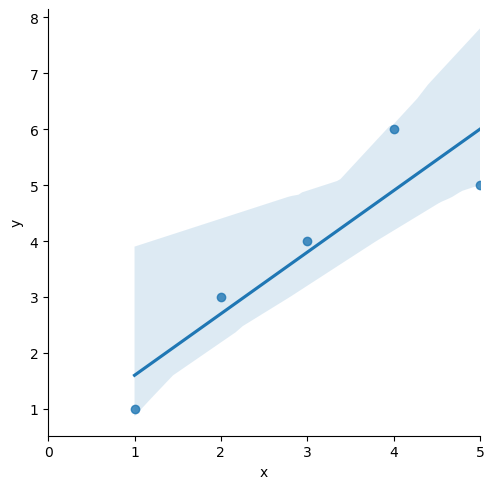

In [7]:
plt.figure(figsize=(10, 7))
sns.lmplot(x='x', y='y', data=df);
plt.xlim([0, 5]) # x축 0부터 시작하게

In [8]:
# 잔차 평가 residue
# 잔차 확인

resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

### 결정게수 R-Squared
* R-Squared = SSR / SST

In [9]:
# numpy로 결정계수 직접 계산
import numpy as np

mu = np.mean(df.y)  # df['y']
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2 / np.sum((y-mu)**2))

0.8175675675675673

In [10]:
# 간단
lm_model.rsquared

0.8175675675675677

/var/folders/fh/vxh95w0j5xj_qtlt37_93z2m0000gn/T/ipykernel_24581/65180061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black')


<Axes: ylabel='Density'>

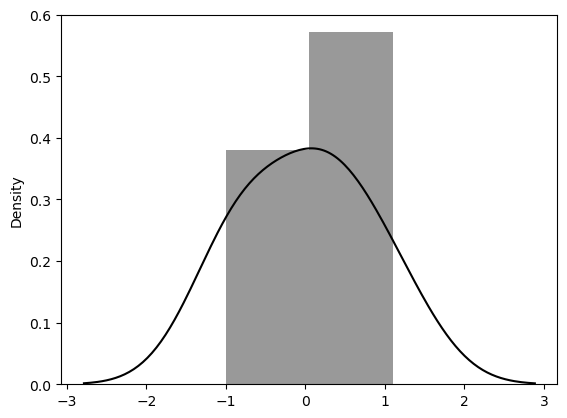

In [11]:
sns.distplot(resid, color='black')